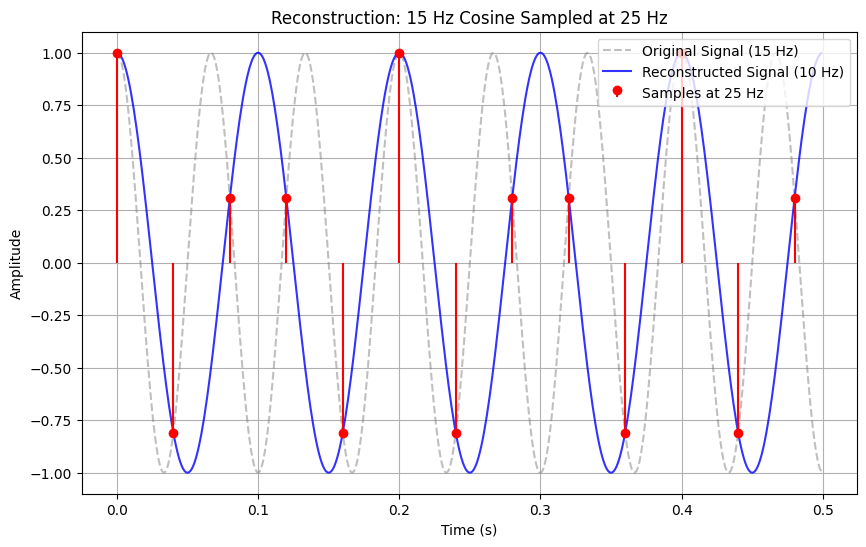

In [9]:
import numpy as np
import matplotlib.pyplot as plt

f_signal = 15  # Frequency of the signal (Hz)
t = np.linspace(0, 0.5, 500, endpoint=False)  # Time vector for high-res plot
signal = np.cos(2 * np.pi * f_signal * t)  # Original signal (Cosine)

f_sample = 25  # Sampling frequency (Hz)

t_sample = np.arange(0, 0.5, 1 / f_sample)
samples = np.cos(2 * np.pi * f_signal * t_sample)

f_alias = abs(f_signal - f_sample)

signal_reconstructed = np.cos(2 * np.pi * f_alias * t)

# 5. Plotting
plt.figure(figsize=(10, 6))

plt.plot(t, signal, label=f'Original Signal ({f_signal} Hz)', 
         color='gray', linestyle='--', alpha=0.5)

plt.plot(t, signal_reconstructed, label=f'Reconstructed Signal ({f_alias} Hz)', 
         color='blue', alpha=0.8)

plt.stem(t_sample, samples, linefmt='r-', markerfmt='ro', basefmt=" ", 
         label=f'Samples at {f_sample} Hz')

plt.title(f'Reconstruction: {f_signal} Hz Cosine Sampled at {f_sample} Hz')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [10]:
import numpy as np
from scipy.fftpack import dct, idct

def apply_dct(signal):
    return dct(signal, norm='ortho')

def reconstruct_signal(dct_signal, threshold):
    dct_signal[np.abs(dct_signal) < threshold] = 0
    return idct(dct_signal, norm='ortho')

original_signal = np.array([12, 24, 36, 48, 60, 72])
threshold_value = 10

dct_coeffs = apply_dct(original_signal)

print("Original Signal:", original_signal)
print("DCT Coefficients (Raw):", np.round(dct_coeffs, 2))

reconstructed_signal = reconstruct_signal(dct_coeffs, threshold=threshold_value)

print("DCT Coefficients (Thresholded):", np.round(dct_coeffs, 2))
print("Reconstructed Signal:", np.round(reconstructed_signal, 2))

Original Signal: [12 24 36 48 60 72]
DCT Coefficients (Raw): [102.88 -49.95   0.    -4.9    0.    -0.96]
DCT Coefficients (Thresholded): [102.88 -49.95   0.     0.     0.     0.  ]
Reconstructed Signal: [14.14 21.61 34.54 49.46 62.39 69.86]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import dct, idct

# 1. Setup Data
signal = np.array([12, 24, 36, 48, 60, 72])
threshold = 10

# 2. Process
dct_coeffs = dct(signal, norm='ortho')
dct_thresh = dct_coeffs.copy()

# Zero out coefficients below threshold
dct_thresh[np.abs(dct_thresh) < threshold] = 0
reconstructed_signal = idct(dct_thresh, norm='ortho')

# 3. Plotting
plt.figure(figsize=(12, 5))

# --- Left Plot: Time Domain (Signals) ---
plt.subplot(1, 2, 1)
plt.plot(signal, 'o-', label='Original', color='blue', alpha=0.6)
plt.plot(reconstructed_signal, 'x--', label='Reconstructed', color='red')
plt.title('Signal Reconstruction')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

plt.title('DCT Coefficients & Threshold')
plt.xlabel('Frequency Index')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()